### EDA + Predection on Laptop Dateset

In [2]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Laptop-Price.csv")                    # Load dataset

In [4]:
df.shape

(1146, 18)

In [5]:
df.describe()

,Inches,SSD,HDD,Flash Storage,Hybrid,Unnamed: 16,Price_euros
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,0.0,1146.000000
mean,15.151396,187.710297,46.347295,1.898778,0.539267,NaN,1204.876972
std,1.319303,160.313927,144.192738,26.275202,15.035060,NaN,676.630847
min,11.300000,0.000000,0.000000,0.000000,0.000000,NaN,265.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,NaN,699.750000
50%,15.600000,256.000000,0.000000,0.000000,0.000000,NaN,1049.750000
75%,15.600000,256.000000,1.000000,0.000000,0.000000,NaN,1535.000000
max,18.400000,512.000000,500.000000,512.000000,508.000000,NaN,6099.000000


In [6]:
df.isnull().sum()                               # Check for null values

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64

In [7]:
df.drop("Unnamed: 16", axis = 1 , inplace = True)                              # Irregular Column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


In [9]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.9


### Performing EDA

In [10]:
# Scatter plot function to compare numerical columns

def relation_plot(col1, col2):
    plt.figure(dpi = 150)
    plt.scatter(df[col1], df[col2], edgecolor = "black")
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks()
    plt.yticks()
    plt.grid()

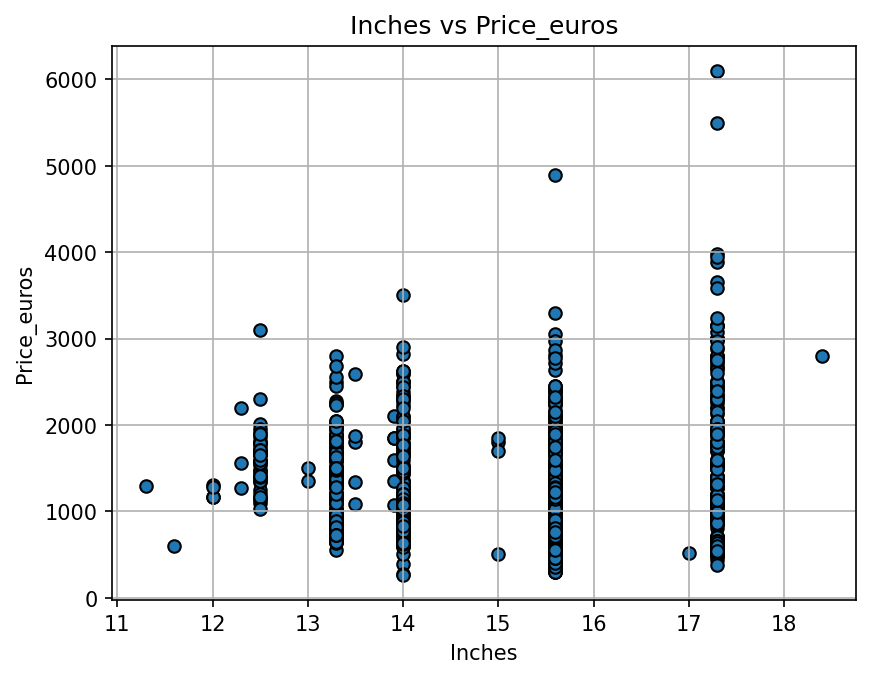

In [11]:
relation_plot('Inches','Price_euros')                                     # Comparing Price wiht Inches

In [12]:
df['Cpu Rate'] = df['Cpu Rate'].replace({'GHz' : ""}, regex = True).astype(float)      # changing Cpu rate to float

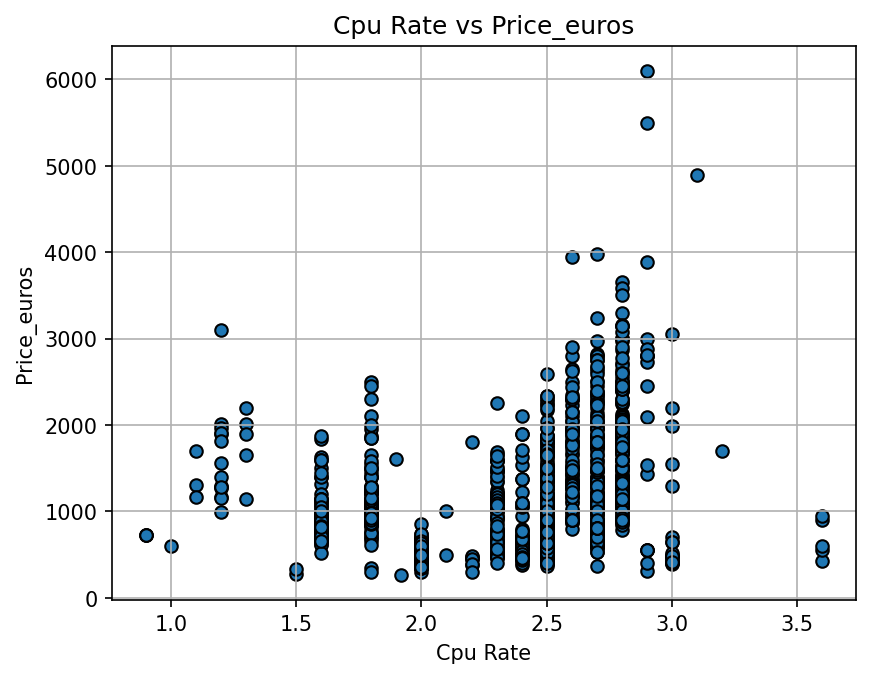

In [13]:
relation_plot('Cpu Rate','Price_euros')

In [14]:
# Barplot function to compare categorical columns to num

def categorical_plot(col1, col2):
    plt.figure(dpi = 150)
    plt.bar(df[col1],df[col2], color = "pink")         
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks(rotation = 90)
    plt.yticks()
    plt.grid()

In [15]:
df['RAM_sort'] = df['Ram'].replace({"GB" : ""}, regex = True).astype(int)             # To compute Ram  -> changed to int

In [16]:
df.sort_values(by ="RAM_sort", inplace = True)                                        # Sort

In [17]:
df['RAM_sort'] = df['RAM_sort'].map(lambda x: f"{x}GB")                               # and change back to string

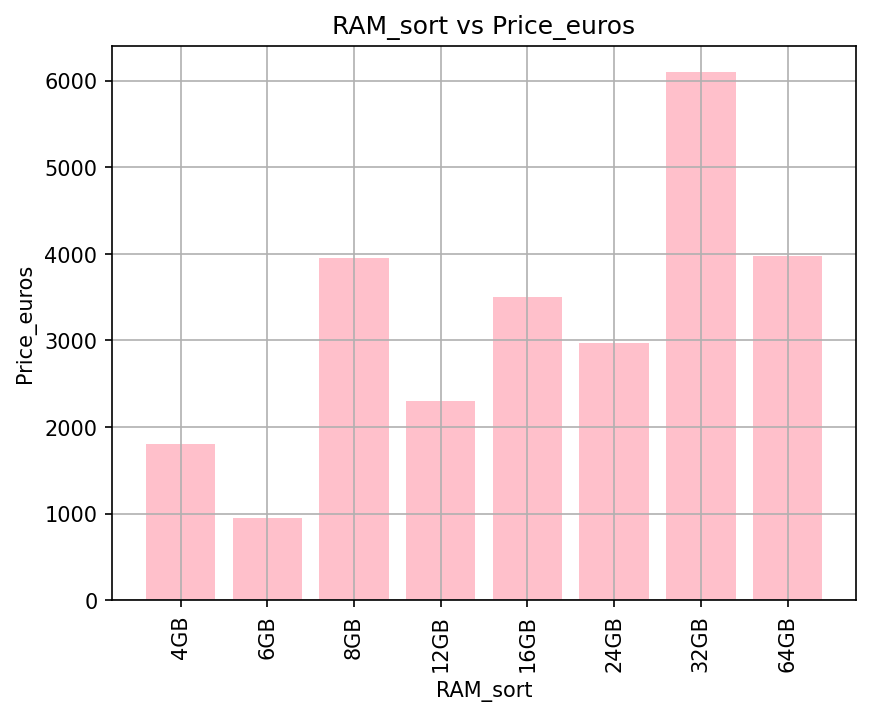

In [18]:
categorical_plot("RAM_sort", "Price_euros")                                           # Comparing Ram and price      

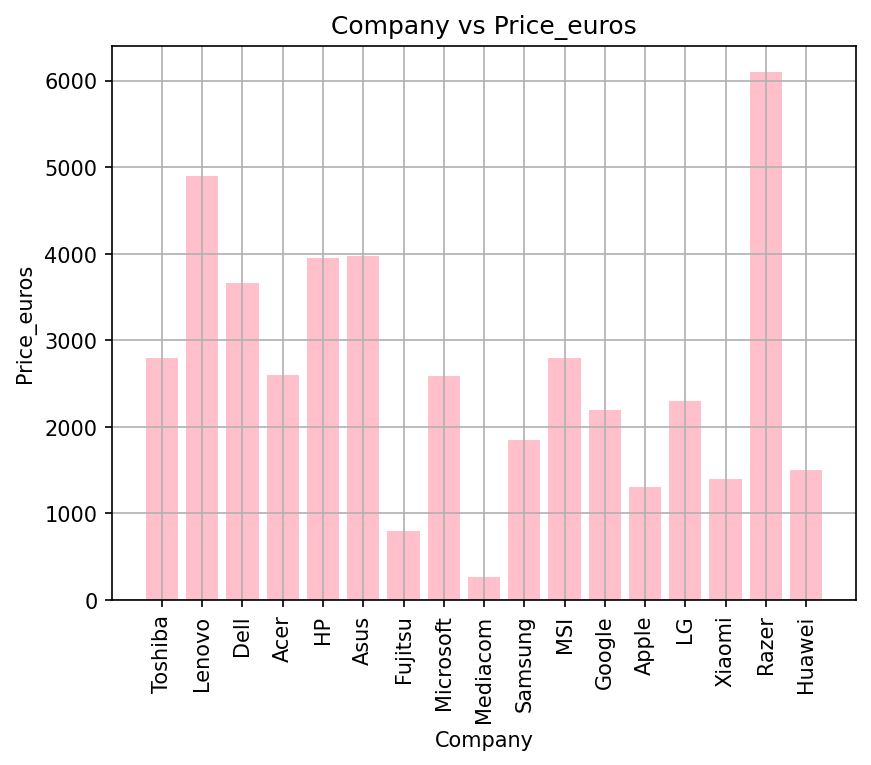

In [19]:
categorical_plot("Company", "Price_euros")                                             

In [20]:
# Statistical function

def statistical_plot(col1, t):
    plt.figure(figsize = (10,6))
    plt.hist(df[col1], bins = 10, color = 'skyblue', edgecolor = 'black')
    plt.xlabel(col1)
    plt.ylabel('Frequency')
    plt.grid()
    plt.title('Distribution of Laptop Prices')

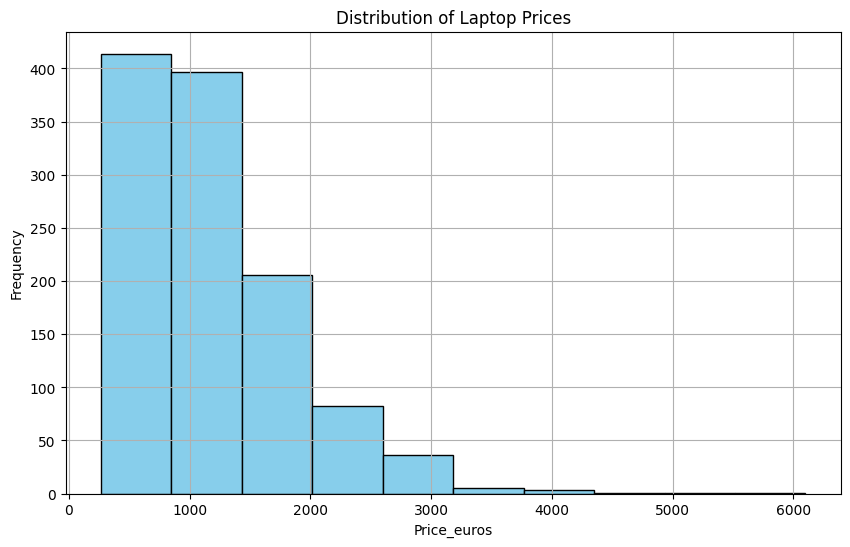

In [21]:
statistical_plot("Price_euros", "Distribution of laptop Prices")

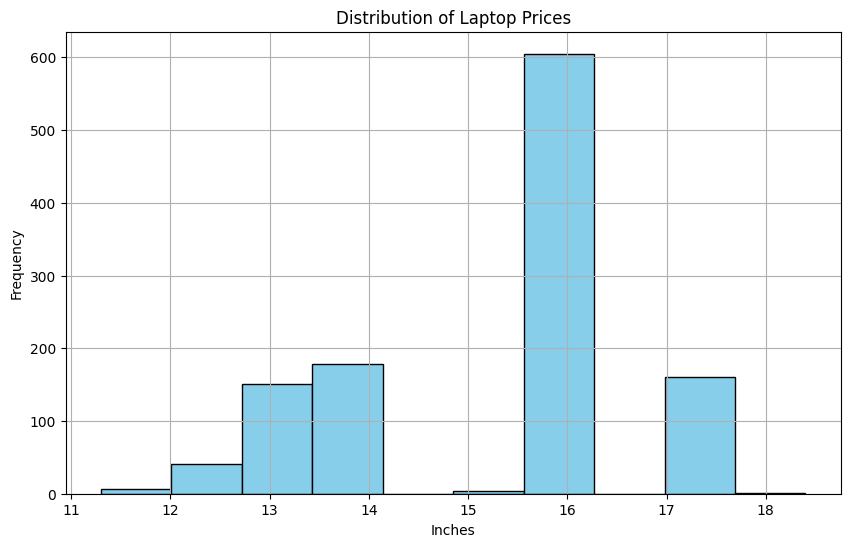

In [22]:
statistical_plot("Inches", "Distribution of Inches")

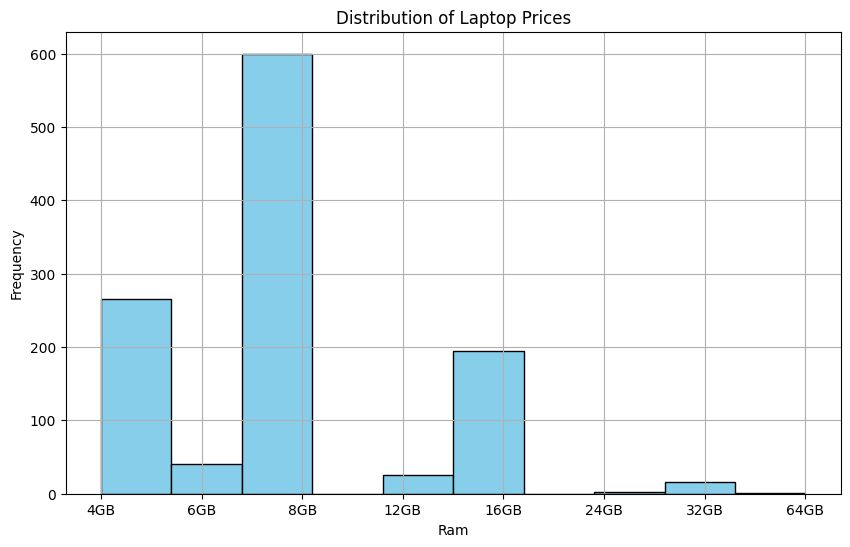

In [23]:
statistical_plot("Ram", "Distribution of RAM")

In [67]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros,RAM
584,Toshiba,Satellite Pro,Notebook,15.6,1366x768,4,Windows 10,Intel,Core i3 6100U,2.1,128,0,0,0,Intel,HD Graphics 520,498.0,4
767,Lenovo,Thinkpad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,4,Windows 10,Intel,Core i3 7100U,2.4,180,0,0,0,Intel,HD Graphics 620,735.0,4
771,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,4,Windows 10,Intel,Core i5 7200U,2.5,128,1,0,0,Nvidia,GeForce 940MX,912.5,4
392,Acer,Aspire ES1-572,Notebook,15.6,1366x768,4,Linux,Intel,Core i5 7200U,2.5,0,500,0,0,Intel,HD Graphics 620,441.8,4
772,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,4,Windows 10,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,839.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,32,Windows 10,Intel,Core i7 6820HK,2.7,256,1,0,0,Nvidia,GeForce GTX 1070,2663.0,32
685,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,32,Windows 10,Intel,Core i7 7700HQ,2.8,1,1,0,0,Nvidia,GeForce GTX 1070M,3588.8,32
432,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,32,Windows 10,Intel,Core i7 7500U,2.7,512,0,0,0,Intel,HD Graphics 620,2799.0,32
148,MSI,GT80S 6QF-074US,Gaming,18.4,Full HD 1920x1080,32,Windows 10,Intel,Core i7 6920HQ,2.9,512,1,0,0,Nvidia,GTX 980 SLI,2799.0,32


In [64]:
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu Brand', 'Cpu Model', 'Gpu Brand', 'Gpu Model']
numerical_cols = ['Inches', 'Ram', 'Cpu Rate', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    sparse_threshold=0
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Fitting the model

In [71]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', 'passthrough',
                                                  ['Inches', 'Ram', 'Cpu Rate',
                                                   'SSD', 'HDD',
                                                   'Flash Storage', 'Hybrid']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'Product',
                                                   'TypeName',
                                                   'ScreenResolution', 'OpSys',
                                                   'Cpu Brand', 'Cpu Model',
                                                   'Gpu Brand',
                                                   'Gpu Model'])])),
                ('classifier', LinearRegression())])

In [79]:
pred_train = pipeline.predict(X_train)

### Report

In [82]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("Evaulation of train data")

Mean_error = mean_squared_error(pred_train,y_train)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_train,pred_train)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_train,pred_train)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_train,pred_train)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 9897.422
RMSE=  99.486
Mean absolute error= 50.7966
Mean Absolute Percentage Error= 0.0423
R_squared= 0.979
